In [52]:
import torch
import numpy
import matplotlib.pyplot as plt

In [53]:
torch.manual_seed(0)

In [54]:
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

In [55]:
xy = numpy.loadtxt("data-02-stock_daily.csv", delimiter=",")
xy = xy[::-1]

train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]

In [56]:
def minmax_scaler(data):
    numerator = data - numpy.min(data, 0)
    denominator = numpy.max(data, 0) - numpy.min(data, 0)
    return numerator / (denominator + 1e-7)

In [57]:
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        _x = time_series[i:i + seq_length, :]
        _y = time_series[i + seq_length, [-1]]
        dataX.append(_x)
        dataY.append(_y)
    
    return numpy.array(dataX), numpy.array(dataY)

In [58]:
train_set = minmax_scaler(train_set)
test_set = minmax_scaler(test_set)

trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)
testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

In [59]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.LSTM(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, output_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x[:, -1])
        return x

In [60]:
net = Net(data_dim, hidden_dim, output_dim, 1)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

0 0.2271038442850113
1 0.18340937793254852
2 0.15106439590454102
3 0.12612313032150269
4 0.10598734766244888
5 0.08915018290281296
6 0.07493706792593002
7 0.06327901780605316
8 0.05449603125452995
9 0.04902385547757149
10 0.04693441465497017
11 0.04731706529855728
12 0.04838264361023903
13 0.04839478060603142
14 0.04633766785264015
15 0.04207771271467209
16 0.036201704293489456
17 0.029662011191248894
18 0.02338656410574913
19 0.018011242151260376
20 0.013800663873553276
21 0.010714655742049217
22 0.008532221429049969
23 0.0069765085354447365
24 0.0058244820684194565
25 0.004987423773854971
26 0.004524713382124901
27 0.004554683342576027
28 0.005089898128062487
29 0.00592096708714962
30 0.006684893276542425
31 0.007072674576193094
32 0.006973991170525551
33 0.006471904926002026
34 0.005753521341830492
35 0.005014693830162287
36 0.004395292140543461
37 0.003953744191676378
38 0.0036766387056559324
39 0.003510984592139721
40 0.0034013083204627037
41 0.0033151081297546625
42 0.00324889435

<function matplotlib.pyplot.show(close=None, block=None)>

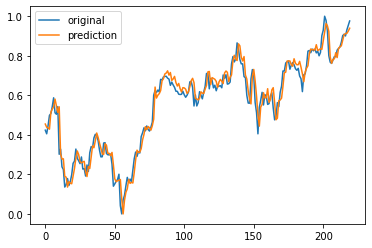

In [61]:
for i in range(iterations):
    optimizer.zero_grad()
    outputs = net(trainX_tensor)
    loss = criterion(outputs, trainY_tensor)
    loss.backward()
    optimizer.step()
    print(i, loss.item())

plt.plot(testY)
plt.plot(net(testX_tensor).detach().numpy())
plt.legend(['original', 'prediction'])
plt.show